In [1]:
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import scipy.stats
import numpy as np
from our_project_classes import investment, bond, portfolio, stock
import random

'''
3 types of investors: Aggresive, defensive and mixed
2 types of investments: Stocks and bonds
'''

### Part I ###

'''
variables = Our inv. term, our inv. amount, min. price, min. term, int. rate

* Short term bonds: 2 years, 250$, 0.015
* Long term bonds: 5 years, 1000$, 0.03
* compounded annually

* Q: Make a plot of the evolution of min. inv. over 50 years.
* We have to think of a loop for both and plot them together

ST: 250*(1+0.015)**2 loop (50/2) times
LT: 1000*(1+0.03)**5 loop (50/5) times

'''

# This part shows how short term bond minimum investment requirement evolves over 50 years.

shortterm = []
styears = []
stminval = 250
stint = 0.015
stdur = 2
ini_year = datetime.date.today()

for i in range(51):
    if i % stdur==0:
        shortterm.append((stminval * ((1+stint) ** i)))
        styears.append(ini_year.year + i)
print(shortterm)
print(styears)

[250.0, 257.5562499999999, 265.3408876562499, 273.36081598566, 281.62314664882655, 290.13520625628723, 298.90454286538346, 307.9389326734896, 317.2463869135458, 326.83515895800764, 336.7137516375134, 346.89092478075713, 357.37570298225546, 368.17738360489403, 379.3055450243519, 390.77005512271285, 402.58108003879676, 414.7490931829693, 427.28488452442446, 440.19957015917515, 453.50460216723616, 467.2117787677407, 481.3332547809956, 495.88155240675115, 510.86957232824506, 526.3106051518662]
[2021, 2023, 2025, 2027, 2029, 2031, 2033, 2035, 2037, 2039, 2041, 2043, 2045, 2047, 2049, 2051, 2053, 2055, 2057, 2059, 2061, 2063, 2065, 2067, 2069, 2071]


In [2]:
# This part shows how long term bond minimum investment requirement evolves over 50 years.

longterm = []
ltyears = []
ltminval = 1000
ltint = 0.03
ltdur = 5

for i in range(51):
    if i % ltdur == 0:
        longterm.append((ltminval * ((1+ltint) ** i)))
        ltyears.append(ini_year.year + i)
print(longterm)
print(ltyears)

[1000.0, 1159.2740743000002, 1343.9163793441223, 1557.967416600765, 1806.111234669415, 2093.777929654216, 2427.2624711896624, 2813.8624543715264, 3262.037791999078, 3781.595841651347, 4383.906018707096]
[2021, 2026, 2031, 2036, 2041, 2046, 2051, 2056, 2061, 2066, 2071]


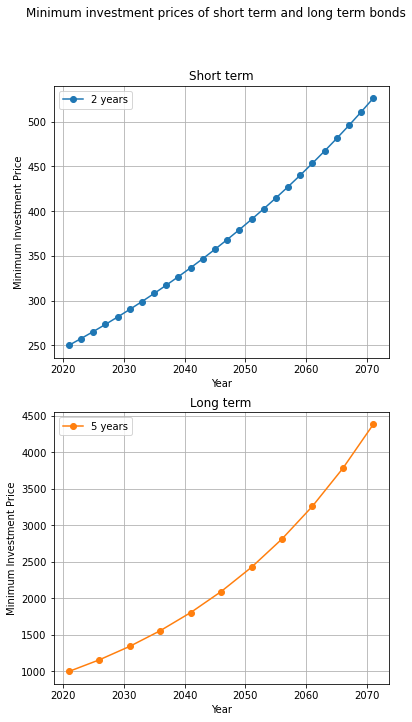

In [3]:
# Now, it is time o plot and export our results:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6,11))
fig.suptitle('Minimum investment prices of short term and long term bonds')
ax1.plot(styears, shortterm, label="Date", color='tab:blue', marker="o")
ax1.set_title("Short term")
ax1.grid(True)
ax1.legend(["2 years"])
ax1.set_xlabel("Year")
ax1.set_ylabel("Minimum Investment Price")
ax2.plot(ltyears, longterm, label="Date", color='tab:orange', marker="o")
ax2.set_title("Long term")
ax2.grid(True)
ax2.legend(["5 years"])
ax2.set_xlabel("Year")
ax2.set_ylabel("Minimum Investment Price")
fig.savefig(os.path.abspath("../Results/min_inv_prices"), dpi=1000)

In [4]:
### Part II ###

'''
Criterias:

* Investment term
* Investment Amount
* Stock name
* The time bought(business days)
* It should be possible to (given the start and end date) to get the price of the stock and return on investment. 
** If a start and end date is not a business day take the closest possible business day before the given date.

'''

# Importing the data required from Yahoo Finance through yfinance library. As required, 'High' section is taken as the stock price.

import yfinance as yf

tickerstouse = ['FDX', 'GOOGL', 'XOM', 'KO', 'NOK', 'MS', 'IBM']

df = yf.download(tickerstouse, start='2016-01-09', end='2021-01-01')['High']
df = df.dropna()
print(df)

[*********************100%***********************]  7 of 7 completed
                   FDX        GOOGL         IBM         KO         MS   NOK  \
Date                                                                          
2016-01-08  137.229996   750.119995  133.820007  42.119999  29.490000  7.43   
2016-01-11  135.050003   735.080017  133.820007  41.860001  28.600000  7.55   
2016-01-12  135.259995   748.340027  133.779999  42.450001  28.879999  7.50   
2016-01-13  136.330002   753.000000  134.279999  42.570000  28.799999  7.50   
2016-01-14  132.839996   739.890015  133.789993  42.169998  27.320000  7.42   
...                ...          ...         ...        ...        ...   ...   
2020-12-24  272.029999  1742.410034  125.099998  53.549999  68.580002  3.92   
2020-12-28  270.100006  1787.000000  126.599998  54.439999  68.839996  3.94   
2020-12-29  265.450012  1788.469971  125.480003  54.490002  68.489998  3.98   
2020-12-30  262.679993  1767.760010  124.849998  54.630001  68

In [5]:
# start date might need a modification because of the last feature of criterias.

df.to_csv("../Data/Part_2_Tickers.csv", sep=";")

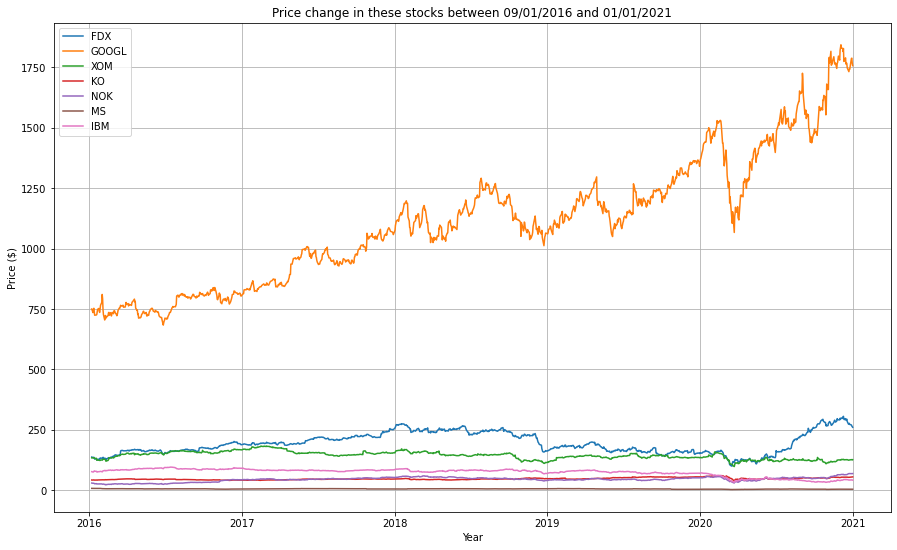

In [6]:
# And now, it is time to plot our data:

fig3 = plt.figure(3, figsize=(15,9))
plt.plot(df)
plt.xlabel('Year')
plt.ylabel('Price ($)')
plt.title('Price change in these stocks between 09/01/2016 and 01/01/2021')
plt.legend(tickerstouse)
plt.grid(True)
plt.show()
fig3.savefig(os.path.abspath('../Results/Stock_Prices.png'), dpi=1000)

In [7]:
### Part III ###

'''
5000$ budget

500 defensive investors;
* will only invest on bonds randomly (50-50). 
* repeated till budget<250$

500 aggresive investors;
* will only invest on stocks. A stock will be chosen randomly.
* First, pick a random stock. Then a random amount (even 0) depending on the budget.
* repeated till budget<100$

500 mixed investors;
* 25-75 of buying stocks or bonds.
* if bond, 50-50 in long and short 
* repeated till budget<250$

You are not gonna lose money. He asks you to make to invest all your money but keep some of it in your budget.

'''

'\n5000$ budget\n\n500 defensive investors;\n* will only invest on bonds randomly (50-50). \n* repeated till budget<250$\n\n500 aggresive investors;\n* will only invest on stocks. A stock will be chosen randomly.\n* First, pick a random stock. Then a random amount (even 0) depending on the budget.\n* repeated till budget<100$\n\n500 mixed investors;\n* 25-75 of buying stocks or bonds.\n* if bond, 50-50 in long and short \n* repeated till budget<250$\n\nYou are not gonna lose money. He asks you to make to invest all your money but keep some of it in your budget.\n\n'

In [8]:
## Test of investment and bond classes ##

x = investment("01/02/2021", 1000)
x1 = investment("01/02/2021", 3000)
y = bond("01/03/2021", 1000, 5, 0.03, "01/03/2026")
y1 = bond("01/03/2021", 3000, 2, 0.05, "01/03/2023")

print(y.ini_date)
print(y.term)
print(y.amount)
print(y.int_rate)

print(x.amount)
print(x.ini_date)
print(x1.amount)
print(x1.ini_date)

print(y.price())
print(y1.price())

Your investment date: 01/02/2021. Your investment amount: 1000
Your investment date: 01/02/2021. Your investment amount: 3000
Your investment date: 01/03/2021. Your investment amount: 1000
Your investment date: 01/03/2021. Your investment amount: 3000
2021-03-01
5
1000
0.03
1000
2021-02-01
3000
2021-02-01
(0.9995889173276241, 1826)
(0.9997260836827201, 730)


In [9]:
## Test of the portfolio class ##

    # Test with integers:

adana = portfolio(3680, 5290, 4363)
print(adana)
print(adana.bond1)
print(adana.bond2)
print(adana.stock)
print(adana.aggresive(3256))
print(adana.defensive(5290, 4363))
print(adana.mixed(3680, 5290, 4363))

5290
4363
3680
3256
4826.5
4539.875


In [10]:
# Let's make things more complicated:
        #P.S. - Never try to run the code below with .compounded

hercai = portfolio((x1.amount), y.amount, y1.amount)
print("Hercai's stock amount: %s" % (hercai.stock))
print("Hercai's 1st bond amount: %s " % (str(hercai.bond1)))
print("Hercai's 2nd bond amount: %s" % (str(hercai.bond2)))
print("If you are aggressive, here is what you get: %s" % (str(hercai.aggresive(x1.amount))))
print("If you are defensive, here is what you get: %s" % (str(hercai.defensive(y.amount, y1.amount))))
print("If you are mixed, here is what you get: %s" % (str(hercai.mixed(x1.amount, y.amount, y1.amount))))

Hercai's stock amount: 3000
Hercai's 1st bond amount: 1000 
Hercai's 2nd bond amount: 3000
If you are aggressive, here is what you get: 3000
If you are defensive, here is what you get: 2000.0
If you are mixed, here is what you get: 2250.0


In [11]:
## Test of the stock class ##

turai = stock("11/03/2021", 1850, "01/05/2023", 3.78, 3.93)
print("Between %s and %s, your initial investment of %s has become %s. Congratulations!" % (turai.ini_date, turai.end_date, turai.amount, turai.rtrn()))

Your investment date: 11/03/2021. Your investment amount: 1850
Between 2021-03-11 and 2023-05-01, your initial investment of 1850 has become 1923.4126984126985. Congratulations!


In [12]:
## Defensive investor ##

    #Here, it is important to note that Python cannot interpret float data as integer
    #This is the reason why our range is defined as integers.
    #In addition, random.sample is not used because the sample of 500 defensive investors would be more than our population.

# Creating random dataset for short term and long term investment amounts:

samples = {'Short Term Sample ' + str(1): random.choices(range(int(shortterm[0]), int(shortterm[-1])), k=500), 'Long Term Sample ' + str(1): random.choices(range(int(longterm[0]), int(longterm[-1])), k=500)}
sample_data = pd.DataFrame(samples)
sample_data

Short Term Sample 1  Long Term Sample 1
0                    501                3951
1                    349                2169
2                    375                3871
3                    372                2125
4                    452                4250
..                   ...                 ...
495                  482                2462
496                  308                1085
497                  422                3263
498                  453                2206
499                  517                3120

[500 rows x 2 columns]

In [13]:
#We have decided to loop this 10 times for certainty because according to our experiments, budget gets below 250 after 6 investments at most.

i=2
for i in range(10):
    sample_data['Short Term Sample ' + str(i+1)] = random.choices(range(int(shortterm[0]), int(shortterm[-1])), k=500)
    sample_data['Long Term Sample ' + str(i+1)] = random.choices(range(int(longterm[0]), int(longterm[-1])), k=500)
sample_data

Short Term Sample 1  Long Term Sample 1  Short Term Sample 2  \
0                    430                1136                  415   
1                    505                1358                  496   
2                    457                1929                  485   
3                    474                3391                  431   
4                    515                2520                  342   
..                   ...                 ...                  ...   
495                  312                1935                  456   
496                  267                1127                  271   
497                  358                1810                  516   
498                  447                4116                  403   
499                  361                2526                  454   

     Long Term Sample 2  Short Term Sample 3  Long Term Sample 3  \
0                  3644                  252                4043   
1                  4242                  418                2420   
2                  1920                  438                3007   
3                  2623                  467                3783   
4                  1473                  509                3380   
..                  ...                  ...                 ...   
495                1959                  367                3530   
496                1497                  442                2685   
497                2197                  367                2222   
498                4265                  403                3701   
499                4149                  255                1200   

     Short Term Sample 4  Long Term Sample 4  Short Term Sample 5  \
0                    394                3872                  420   
1                    333                2122                  367   
2                    307                1538                  307   
3                    397                3693                  503   
4                    278                3352                  252   
..                   ...                 ...                  ...   
495                  356                3866                  398   
496                  339                4043                  475   
497                  519                4165                  467   
498                  274                3773                  282   
499                  503                2451                  434   

     Long Term Sample 5  Short Term Sample 6  Long Term Sample 6  \
0                  4014                  372                2162   
1                  1941                  305                1670   
2                  3557                  352                2061   
3                  1370                  484                3649   
4                  3208                  313                4045   
..                  ...                  ...                 ...   
495                2069                  475                1449   
496                2287                  407                1467   
497                2477                  404                2336   
498                2166                  332                2261   
499                1349                  332                2390   

     Short Term Sample 7  Long Term Sample 7  Short Term Sample 8  \
0                    280                1752                  365   
1                    455                1956                  280   
2                    303                2155                  353   
3                    386                2190                  416   
4                    264                1747                  255   
..                   ...                 ...                  ...   
495                  291                2684                  387   
496                  432                1404                  339   
497                  334                1465                  370   
498                  43

In [14]:
#saving this as csv:

sample_data.to_csv("../Data/Defensive_Investor_Data.csv", sep=";", index=False)

In [15]:
budget = 5000
budget -= portfolio.defensive(0, sample_data.iloc[0]['Short Term Sample ' + str(1)], sample_data.iloc[0]['Long Term Sample ' + str(1)])
budget

4217.0

In [16]:
budget = 5000
budget_list = []
budget_list2 = []

def_investor = sample_data.sample()

for j in range(21):
    budget -= portfolio.defensive(0, def_investor.iloc[0]['Short Term Sample ' + str(j+1)], def_investor.iloc[0]['Long Term Sample ' + str(j+1)])
    if budget < 250:
        break
    budget_list.append(budget)

budget_list2.append(budget_list[-1])
print(budget_list, budget_list2)
def_investor

[4140.5, 3044.5, 2099.0] [2099.0]


Short Term Sample 1  Long Term Sample 1  Short Term Sample 2  \
15                  341                1378                  442   

    Long Term Sample 2  Short Term Sample 3  Long Term Sample 3  \
15                1750                  409                1482   

    Short Term Sample 4  Long Term Sample 4  Short Term Sample 5  \
15                  298                4227                  256   

    Long Term Sample 5  Short Term Sample 6  Long Term Sample 6  \
15                4053                  452                3362   

    Short Term Sample 7  Long Term Sample 7  Short Term Sample 8  \
15                  340                2314                  455   

    Long Term Sample 8  Short Term Sample 9  Long Term Sample 9  \
15                3263                  272                4373   

    Short Term Sample 10  Long Term Sample 10  
15                   493                 3120

In [17]:
shortterm_sample = random.choices(range(int(shortterm[0]), int(shortterm[-1])), k=500)
longterm_sample = random.choices(range(int(longterm[0]), int(longterm[-1])), k=500)

tafdi = portfolio(random.choice(longterm_sample), random.choice(shortterm_sample), random.choice(longterm_sample))
print(tafdi.defensive(tafdi.bond1, tafdi.bond2), tafdi.aggresive(tafdi.stock), tafdi.mixed(tafdi.stock, tafdi.bond1, tafdi.bond2))

1901.0 1721 1856.0


In [18]:
# Creating a loop for only 1 investor:

budget = 5000
def_investors = []
butce = []

for i in range(501):
    budget -= tafdi.defensive(tafdi.bond1, tafdi.bond2)
    def_investors.append(tafdi.defensive(tafdi.bond1, tafdi.bond2))
    if budget < 250:
        break
    butce.append(budget)
    print(def_investors, butce)

[1901.0] [3099.0]
[1901.0, 1901.0] [3099.0, 1198.0]


In [19]:
budget = 5000

for i in enumerate(shortterm_sample):      #doesn't really matter since they are both 500
    tafdi = portfolio(random.choice(longterm_sample), random.choice(shortterm_sample), random.choice(shortterm_sample))
    inv_bond = []
    inv_budget = []
    inv_bond.append(tafdi.bond1)
    inv_bond.append(tafdi.bond2)
    budget -= tafdi.defensive(tafdi.bond1, tafdi.bond2)
    if budget < 250:
        break
    inv_budget.append(budget)
    print(inv_bond, inv_budget)

[296, 367] [4668.5]
[335, 454] [4274.0]
[427, 442] [3839.5]
[284, 353] [3521.0]
[429, 363] [3125.0]
[430, 335] [2742.5]
[407, 435] [2321.5]
[330, 416] [1948.5]
[322, 393] [1591.0]
[439, 380] [1181.5]
[340, 517] [753.0]
[491, 332] [341.5]


In [20]:
## Aggressive investor ##

#Creation of 500 random investment from our dataframe. The random selection is not replaced because 2 or more investors are not forbidden to buy stocks on the same day.

chosen_stocks = df.sample(n=500, replace=False)
chosen_stocks

FDX        GOOGL         IBM         KO         MS   NOK  \
Date                                                                          
2017-12-07  240.279999  1048.920044  154.449997  46.320000  52.730000  4.72   
2017-05-22  191.899994   964.820007  152.839996  44.220001  42.169998  6.24   
2018-06-22  248.139999  1175.000000  141.809998  43.410000  50.540001  5.98   
2019-09-05  165.360001  1214.000000  141.699997  55.770000  43.110001  5.00   
2016-09-26  176.160004   810.080017  154.460007  42.720001  31.570000  5.65   
...                ...          ...         ...        ...        ...   ...   
2019-03-14  179.529999  1204.699951  138.940002  46.110001  42.919998  6.25   
2018-10-18  223.429993  1132.349976  133.399994  46.080002  47.490002  5.65   
2018-03-09  247.389999  1161.000000  159.580002  44.820000  58.790001  5.94   
2016-11-25  191.839996   782.900024  163.190002  41.580002  41.200001  4.36   
2019-01-10  170.619995  1079.810059  121.860001  47.090000  41.959999  6.18   

                  XOM  
Date                   
2017-12-07  82.620003  
2017-05-22  82.330002  
2018-06-22  81.940002  
2019-09-05  70.550003  
2016-09-26  84.500000  
...               ...  
2019-03-14  80.910004  
2018-10-18  82.470001  
2018-03-09  75.059998  
2016-11-25  87.139999  
2019-01-10  72.080002  

[500 rows x 7 columns]

In [21]:
# Exporting our data as CSV file:

chosen_stocks.to_csv("../Data/Aggressive_investors_stocks.csv", sep=";")

FDX        GOOGL         IBM         KO         MS   NOK  \
Date                                                                          
2017-05-17  194.139999   960.989990  154.139999  44.169998  43.380001  6.23   
2018-04-19  254.979996  1097.510010  149.210007  44.470001  54.830002  5.87   
2016-07-05  153.059998   708.119995  152.000000  45.669998  25.570000  5.40   
2019-11-06  164.619995  1292.989990  138.779999  52.799999  48.799999  3.64   
2020-01-23  155.339996  1493.500000  144.410004  57.849998  55.650002  4.08   
2020-12-17  293.899994  1766.709961  126.089996  53.709999  64.750000  4.09   
2017-10-04  223.470001   974.400024  147.020004  45.560001  49.330002  5.94   
2019-12-30  153.300003  1357.000000  135.300003  55.389999  51.380001  3.72   
2016-01-13  136.330002   753.000000  134.279999  42.570000  28.799999  7.50   
2017-10-20  225.850006  1008.650024  162.479996  46.590000  50.910000  6.11   

                  XOM  
Date                   
2017-05-17  83.040001  
2018-04-19  79.820000  
2016-07-05  93.599998  
2019-11-06  72.870003  
2020-01-23  66.930000  
2020-12-17  44.040001  
2017-10-04  81.870003  
2019-12-30  70.440002  
2016-01-13  77.059998  
2017-10-20  83.129997

[4848.0,
 4803.529998779297,
 4798.129998683929,
 4659.349999904633,
 4579.530000209808,
 4521.680001735687,
 3228.6900115013123,
 3222.820011615753,
 2514.7000164985657,
 2365.4900097846985,
 2307.6400113105774,
 2258.840012073517,
 2200.9900135993958,
 2056.5800099372864,
 2052.5000100135803,
 1903.2900032997131,
 1823.470003604889,
 1671.470003604889,
 1667.3900036811829,
 1515.3900036811829,
 1462.5900044441223,
 1407.7600026130676,
 1403.6800026893616,
 1348.8500008583069,
 1204.4399971961975,
 1060.0299935340881,
 1014.3599953651428,
 875.579996585846,
 808.6499962806702,
 750.7999978065491,
 725.2299981117249,
 680.7599968910217,
 622.9099984169006,
 617.0399985313416,
 550.1099982261658,
 398.10999822616577]

In [56]:
agr_investor_list = []
agr_inv_list = []
budget_agr = 5000

#random selection of stocks to invest:

for i in range(501):
    agr_investor_list.append(chosen_stocks.iloc[random.choice(range(1,500))][random.choice(range(1,7))])

print(agr_investor_list)

#again, random selection from the list .

for i in range(501):
    budget_agr -= portfolio.aggresive(0, random.choice(agr_investor_list))
    if budget_agr < 100:
        break
    agr_inv_list.append(budget_agr)

agr_inv_list

[141.80999755859375, 46.02000045776367, 1092.8599853515625, 49.84000015258789, 53.70000076293945, 42.11000061035156, 44.86000061035156, 1048.449951171875, 1151.5799560546875, 32.060001373291016, 77.05999755859375, 46.41999816894531, 125.30000305175781, 4.099999904632568, 725.5700073242188, 5.400000095367432, 141.49000549316406, 42.709999084472656, 44.130001068115234, 824.260009765625, 41.209999084472656, 6.050000190734863, 737.1500244140625, 5.730000019073486, 53.709999084472656, 90.9000015258789, 2.5399999618530273, 6.320000171661377, 142.9499969482422, 1613.4200439453125, 84.12999725341797, 39.59000015258789, 6.230000019073486, 1144.1400146484375, 748.3400268554688, 5.150000095367432, 74.08000183105469, 49.099998474121094, 83.6500015258789, 730.9000244140625, 4.900000095367432, 5.909999847412109, 745.239990234375, 160.75, 3.4000000953674316, 1005.5999755859375, 53.709999084472656, 4.880000114440918, 47.77000045776367, 52.58000183105469, 1179.8699951171875, 87.38999938964844, 5.119999

[4923.800003051758,
 4918.71000289917,
 4830.7200050354,
 4754.520008087158,
 4670.350009918213,
 4525.010013580322,
 4521.610013484955,
 4467.73001241684,
 4414.73001241684,
 4408.350012302399,
 3674.5900025367737,
 3670.4200024604797,
 3665.0500025749207,
 3622.3000025749207,
 2886.1400294303894,
 2843.6700282096863,
 2794.5800280570984,
 2638.7300219535828,
 2594.0100207328796,
 2590.6300206184387,
 2443.120026111603,
 1612.7400212287903,
 859.7400212287903,
 817.6200222969055,
 776.7900204658508,
 651.5400204658508,
 472.29002046585083]

TypeError: Cannot interpret '5' as a data type